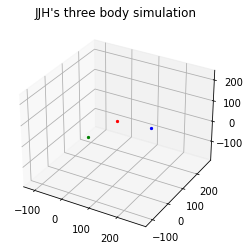

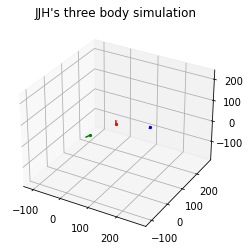

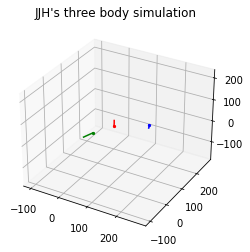

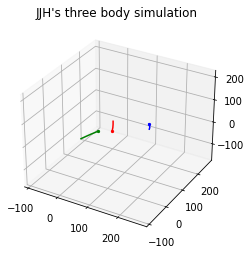

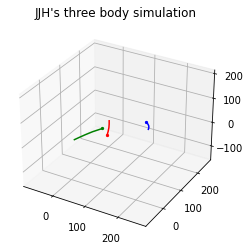

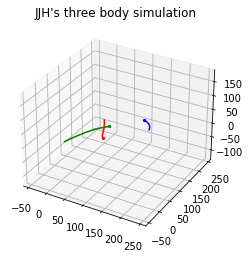

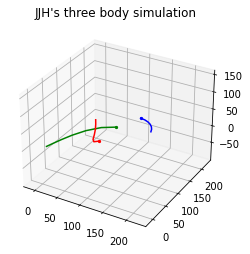

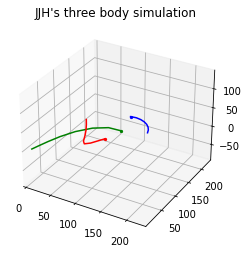

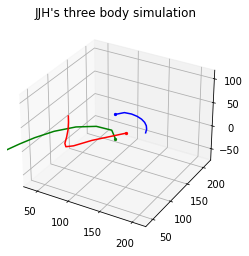

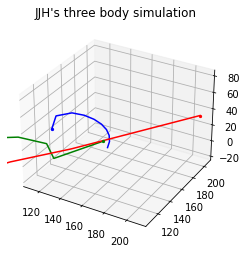

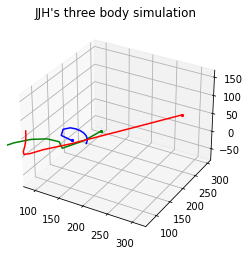

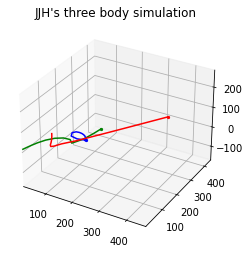

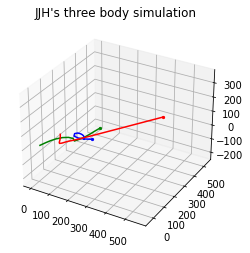

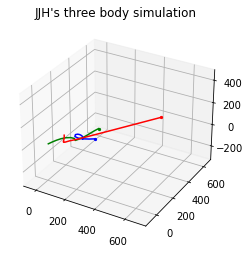

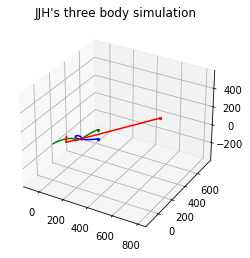

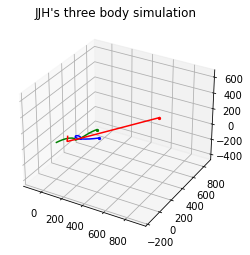

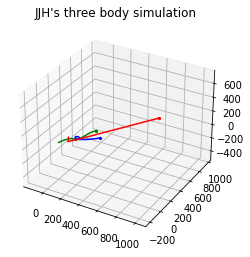

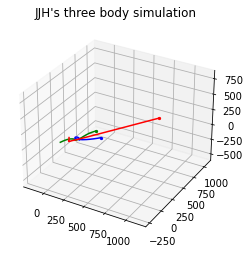

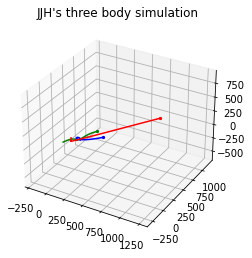

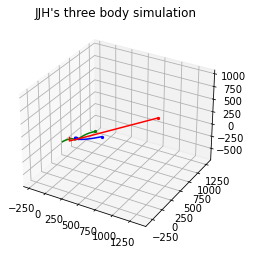

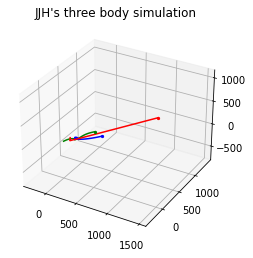

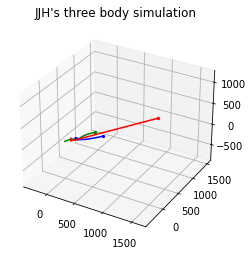

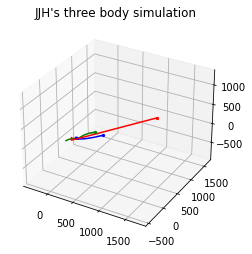

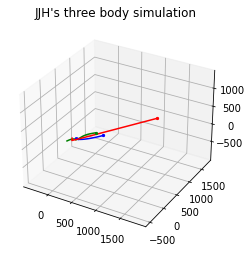

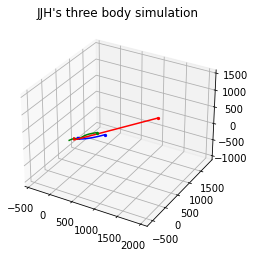

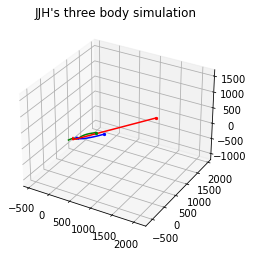

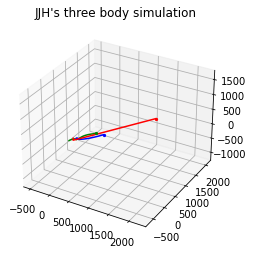

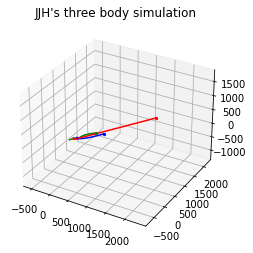

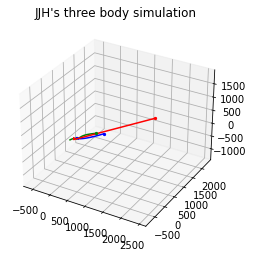

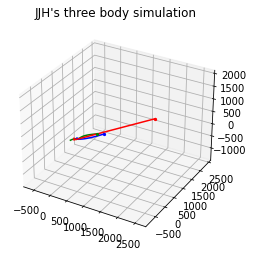

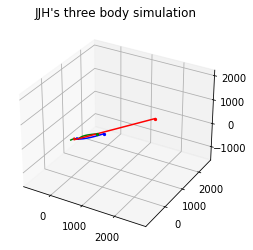

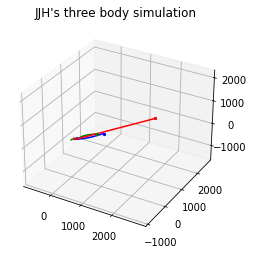

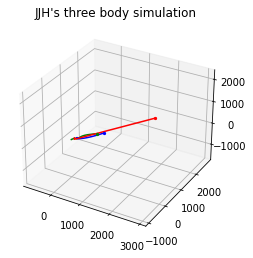

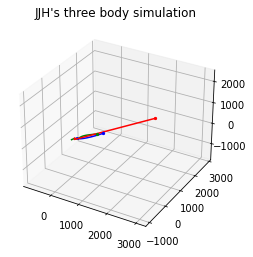

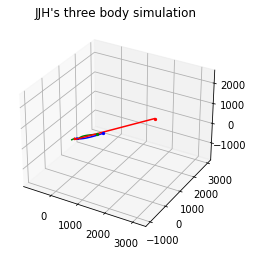

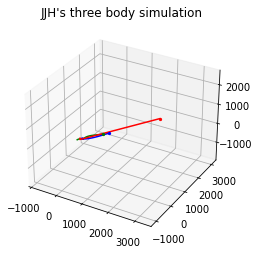

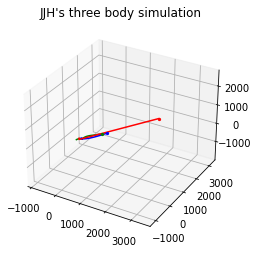

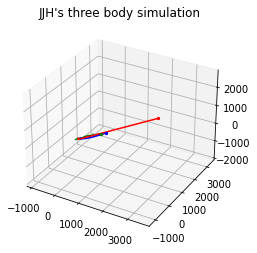

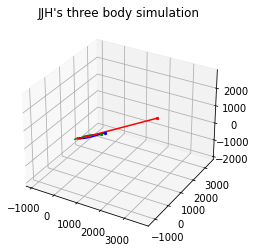

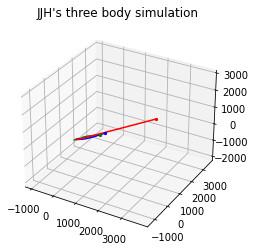

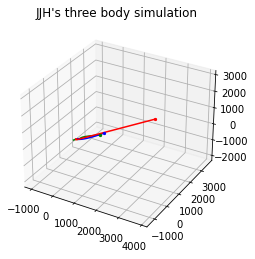

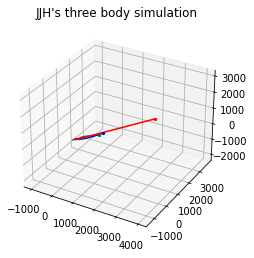

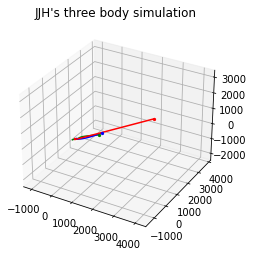

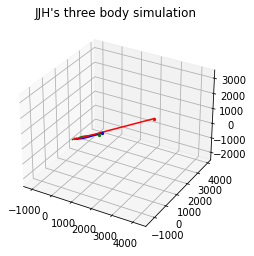

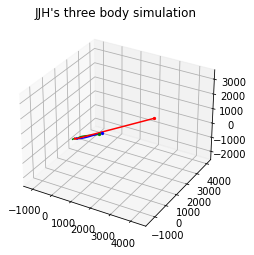

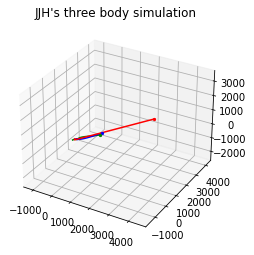

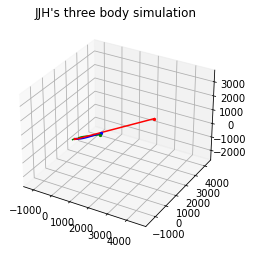

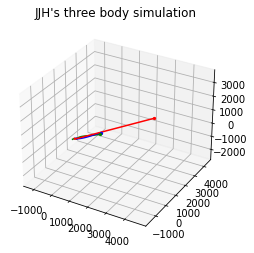

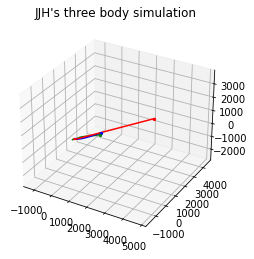

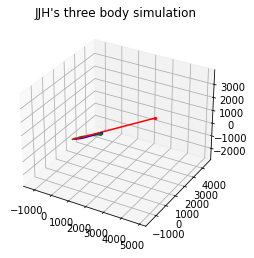

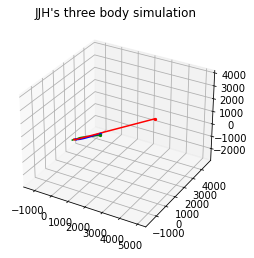

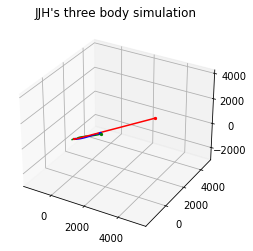

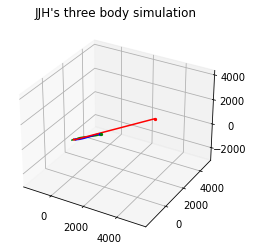

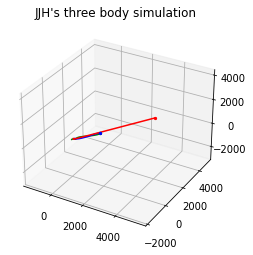

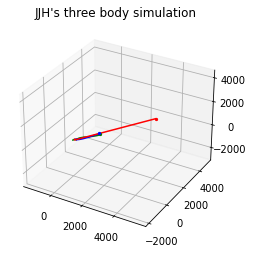

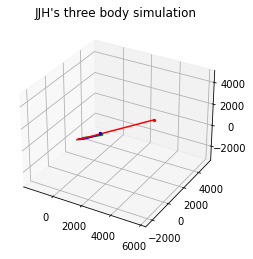

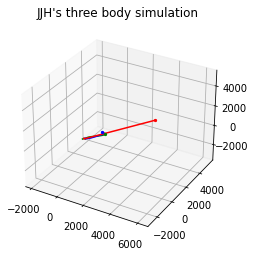

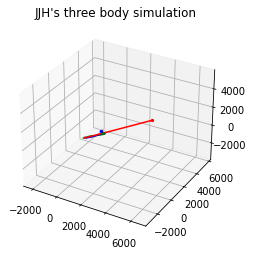

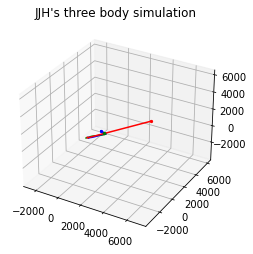

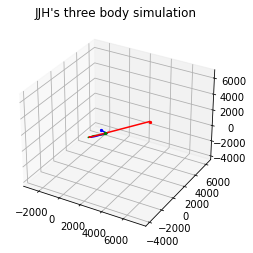

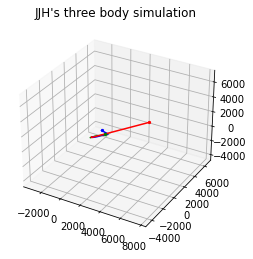

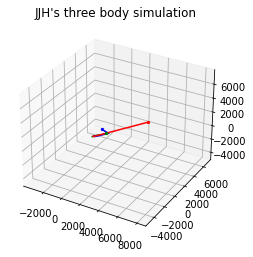

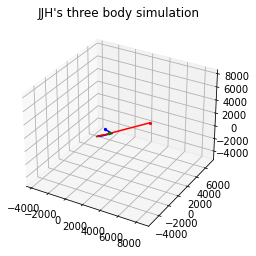

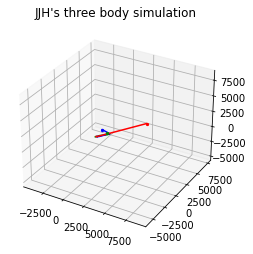

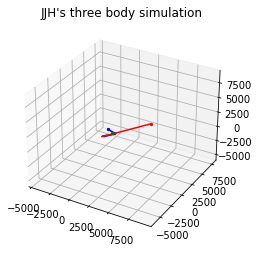

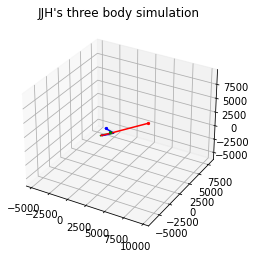

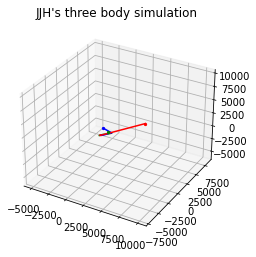

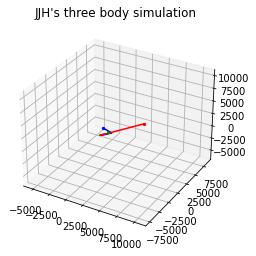

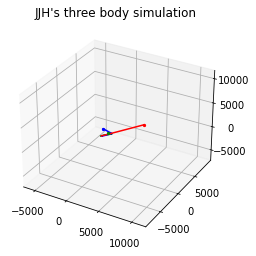

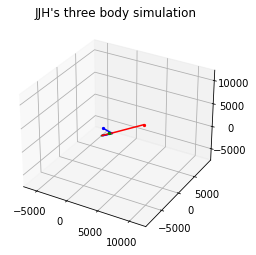

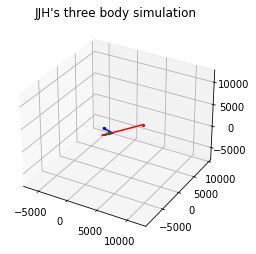

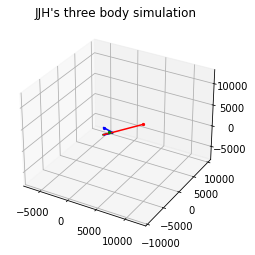

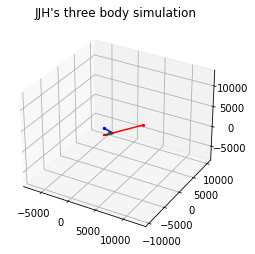

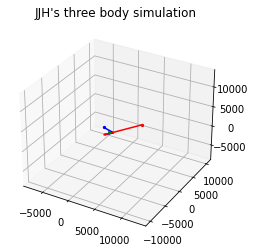

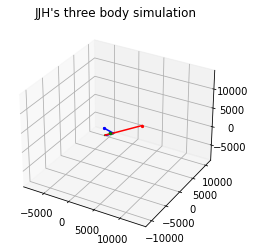

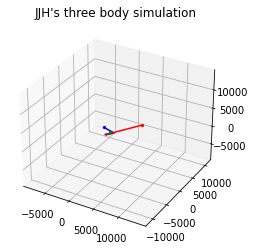

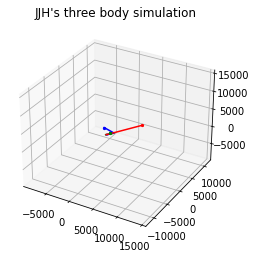

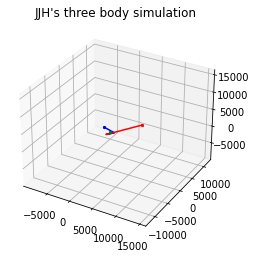

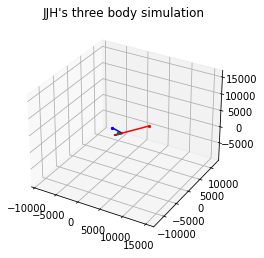

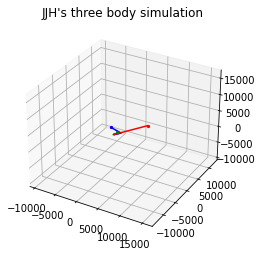

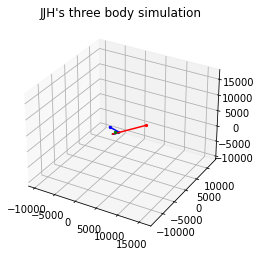

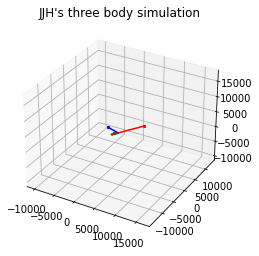

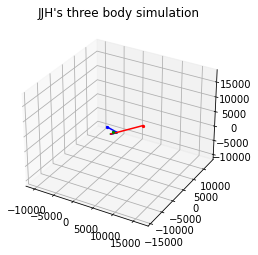

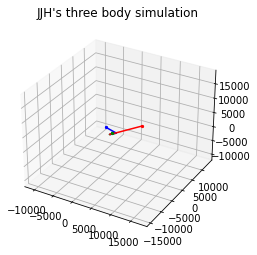

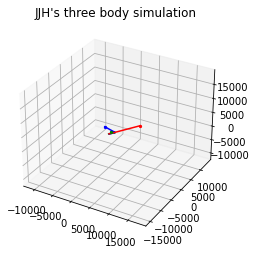

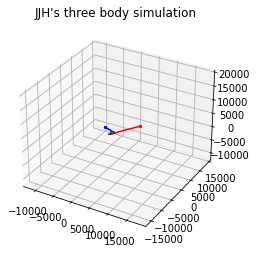

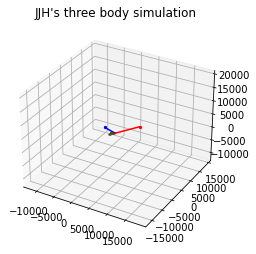

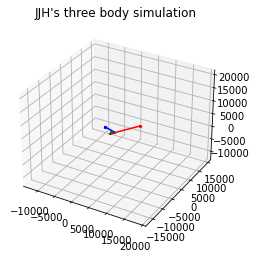

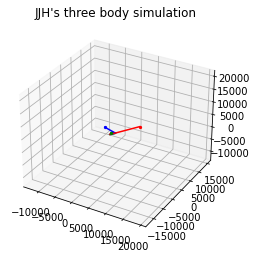

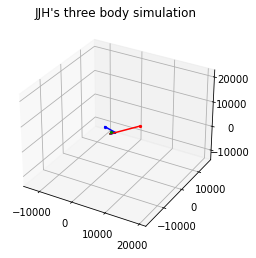

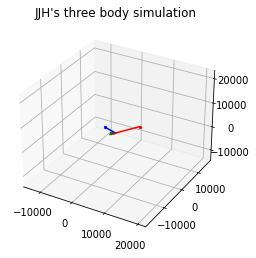

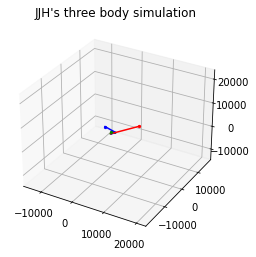

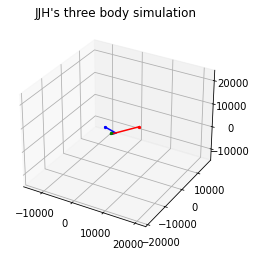

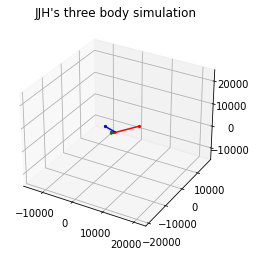

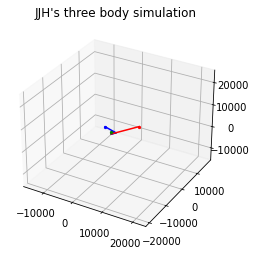

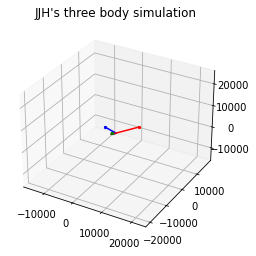

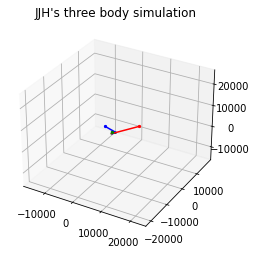

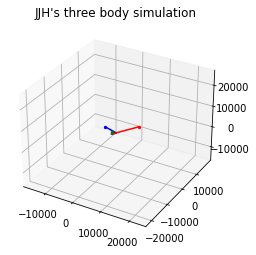

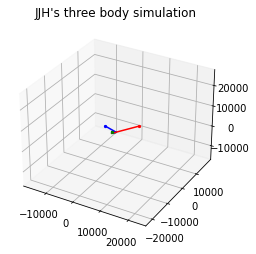

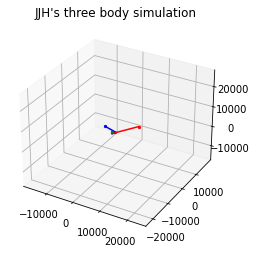

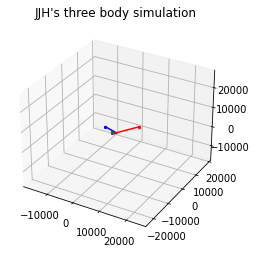

KeyboardInterrupt: 

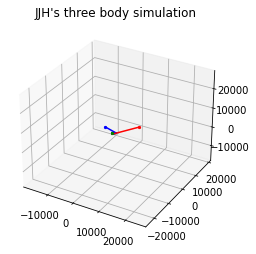

In [4]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import  numpy as np


class Node:
    x = 0
    y = 0
    z = 0
    m = 0
    a_x = 0
    a_y = 0
    a_z = 0
    v_x = 0
    v_y = 0
    v_z = 0
    x_all = []
    y_all = []
    z_all = []
    def __init__(self,x,y,z,v_x,v_y,v_z,m):
        self.x = x
        self.y = y
        self.z = z
        self.v_x = v_x
        self.v_y = v_y
        self.v_z = v_z
        self.m = m
    def next(self,t):
        self.v_x = self.v_x+self.a_x*t
        self.v_y = self.v_y+self.a_y*t
        self.v_z = self.v_z+self.a_z*t
        self.x = self.x+self.v_x*t
        self.y = self.y+self.v_y*t
        self.z = self.z+self.v_z*t
        self.x_all = np.append(self.x_all,self.x)
        self.y_all = np.append(self.y_all,self.y)
        self.z_all = np.append(self.z_all,self.z)

# fig = plt.figure()
plt.ion()

A = Node(0,0,0,1,0,1,5)#green
B = Node(150,150,0,0,1,0,5)#blue
C = Node(75,75,75,0,0,-1,5)#red
G = 50
t = 10
i0 = 0

while(True):


    r12 = np.sqrt((A.x - B.x) ** 2 + (A.y - B.y) ** 2+(A.z-B.z)**2)
    r13 = np.sqrt((A.x - C.x) ** 2 + (A.y - C.y) ** 2+(A.z-C.z)**2)
    r23 = np.sqrt((C.x - B.x) ** 2 + (C.y - B.y) ** 2+(C.z-B.z)**2)
    r12 = max(r12, 5)
    r23 = max(r23, 5)
    r13 = max(r13, 5)

    # 物体A

    a12 = G * B.m / (r12 ** 2)
    a13 = G * C.m / (r13 ** 2)
    A.a_x = a12 * ((B.x - A.x) / r12) + a13 * ((C.x - A.x) / r13)
    A.a_y = a12 * ((B.y - A.y) / r12) + a13 * ((C.y - A.y) / r13)
    A.a_z = a12 * ((B.z - A.z) / r12) + a13 * ((C.z - A.z) / r13)
    A.next(t)

    # 物体B
    a21 = G * A.m / (r12 ** 2)
    a23 = G * C.m / (r23 ** 2)
    B.a_x = a21 * (A.x - B.x) / r12 + a23 * (C.x - B.x) / r23
    B.a_y = a21 * (A.y - B.y) / r12 + a23 * (C.y - B.y) / r23
    B.a_z = a21 * (A.z - B.z) / r12 + a23 * (C.z - B.z) / r23
    B.next(t)

    # 物体C
    a31 = G * A.m / (r13 ** 2)
    a32 = G * B.m / (r23 ** 2)
    C.a_x = a31 * (A.x - C.x) / r13 + a32 * (B.x - C.x) / r23
    C.a_y = a31 * (A.y - C.y) / r13 + a32 * (B.y - C.y) / r23
    C.a_z = a31 * (A.z - C.z) / r13 + a32 * (B.z - C.z) / r23
    C.next(t)

    obmax = max(r12, max(r23, r13)) * 1
    centerx = (A.x + B.x + C.x) / 3
    centery = (A.y + B.y + C.y) / 3
    centerz = (A.z + B.z + C.z) / 3
    ax1 = plt.axes(projection='3d')
    plt.title("JJH's three body simulation")
    ax1.scatter(A.x,A.y,A.z,zdir='z', s=A.m, c='green')
    ax1.scatter(B.x,B.y,B.z,zdir='z', s=B.m, c='blue')
    ax1.scatter(C.x,C.y,C.z, zdir='z', s=C.m, c='red')
    ax1.plot(A.x_all,A.y_all,A.z_all,"green")
    ax1.plot(B.x_all,B.y_all,B.z_all, "blue")
    ax1.plot(C.x_all, C.y_all, C.z_all, "red")
    ax1.set_zlim3d(centerz-obmax,centerz+obmax)
    ax1.set_xlim3d(centerx-obmax,centerx+obmax)
    ax1.set_ylim3d(centery-obmax,centery+obmax)
    plt.savefig(str(i0)+'.jpg')
    i0 += 1
    plt.show()
    plt.pause(0.000000005)
    plt.clf()

In [1]:
def three_body_problem(G=6.67259e-11,t=1,zs=100,save=False):
    observation_max = 100
    import numpy as np
    import matplotlib.pyplot as plt
    import os
    import itertools
    plt.ion()  # 开启交互模式
    n = int(input("星体个数:"))
    x_y_all = np.zeros((n,2))
    x_y_all_all = []
    x_y_v_all = np.zeros((n,2))
    mass = []
    density = []
    for i in range(n):
        mass.append(float(input(f"mass{i+1}:")))
    for i in range(n):
        density.append(float(input(f"density{i+1}:")))
    for i in range(n):
        x_y_all[i][0] = float(input(f"x{i+1}:"))
        x_y_all[i][1] = float(input(f"y{i+1}:"))
    for i in range(n):
        x_y_v_all[i][0] = float(input(f"v{i+1}_x:"))
        x_y_v_all[i][1] = float(input(f"v{i+1}_y:"))
    i0 = 0
    for i in range(zs):
        list1 = list(itertools.combinations(x_y_all,2))
        list11 = {}
        kkkk = 0
        for j in range(n-1):
            for h in range(j+1):
                list11[str(h+1)+str(j+2)] = list1[kkkk]
                kkkk += 1
        distance = {}
        for s in range(n):
            for d in range(s):
                distance[str(d+1)+str(s+1)] = np.sqrt((list11[str(d+1)+str(s+1)][0][0]-list11[str(d+1)+str(s+1)][1][0])**2+(list11[str(d+1)+str(s+1)][0][1]-list11[str(d+1)+str(s+1)][1][1])**2)
        a = {}
        for j in range(n):
            for x in range(n):
                if j != x:
                    if j < x:
                        a[str(j+1)+str(x+1)] = G*mass[x]/(distance[str(j+1)+str(x+1)]**2)
                    else:
                        a[str(j+1)+str(x+1)] = G*mass[x]/(distance[str(x+1)+str(j+1)]**2)
        ax = []
        ay = []
        for j in range(n):
            count11111 = 0
            count111111 = 0
            for x in range(n):
                if j != x:
                    if j < x:
                        count11111 += (a[str(j+1)+str(x+1)]*(x_y_all[x][0]-x_y_all[j][0])/distance[str(j+1)+str(x+1)])
                        count111111 += (a[str(j+1)+str(x+1)]*(x_y_all[x][1]-x_y_all[j][1])/distance[str(j+1)+str(x+1)])
                    else:
                        count11111 += (a[str(j+1)+str(x+1)]*(x_y_all[x][0]-x_y_all[j][0])/distance[str(x+1)+str(j+1)])
                        count111111 += (a[str(j+1)+str(x+1)]*(x_y_all[x][1]-x_y_all[j][1])/distance[str(x+1)+str(j+1)])
            ax.append(count11111)
            ay.append(count111111)
        oooooo = []
        for j in range(n):
            oooooo.append([ax[j],ay[j]])
        x_y_v_all = x_y_v_all+np.array(oooooo)*t
        x_y_all = x_y_all+x_y_v_all*t
        x_y_all_all.append(x_y_all)
        x_all_all = []
        y_all_all = []
        for j in x_y_all_all:
            x_all_all.append(j[:,0])
            y_all_all.append(j[:,1])
        axis_x = np.mean(x_y_all[:,0])
        axis_y = np.mean(x_y_all[:,1])
        while True:
            true_false = []
            for j in range(n):
                for x in range(2):
                    if x == 0:
                        if x_y_all[:,0][j] > observation_max:
                            true_false.append(True)
                        else:
                            true_false.append(False)
                    else:
                        if x_y_all[:,1][j] > observation_max:
                            true_false.append(True)
                        else:
                            true_false.append(False)
            true_false1 = []
            for j in range(n):
                for x in range(2):
                    if x == 0:
                        if x_y_all[:,0][j] < observation_max/10:
                            true_false1.append(True)
                        else:
                            true_false1.append(False)
                    else:
                        if x_y_all[:,1][j] < observation_max/10:
                            true_false1.append(True)
                        else:
                            true_false1.append(False)
            if true_false.count(True) > 0:
                observation_max = observation_max * 2
            elif true_false1.count(True) == n*2:
                observation_max = observation_max / 2
            else:
                break
        plt.axis([axis_x-observation_max, axis_x+observation_max, axis_y-observation_max,  axis_y+observation_max])
        for j in range(n):
            plt.plot(x_all_all[-1][j],y_all_all[-1][j],"or",markersize=mass[j]*density[j])
            gx = []
            gy = []
            for x in x_all_all:
                gx.append(x[j])
            for x in y_all_all:
                gy.append(x[j])
            plt.plot(gx,gy)
        print(i0)
        if save:
            print("saveing...")
            plt.savefig(str(i0)+'.jpg')
        plt.show()
        i0 += 1
        plt.clf()

In [2]:
with open("G.txt","w") as f:
    f.write(str(6.67259e-11))

In [3]:
1.989e+30

1.989e+30

In [ ]:
with open("G.txt","r") as f:
    g = float(f.read())
three_body_problem(G=9.8,t=int(input("模拟精度:")),zs=int(input("模拟帧数:")),save=True)

模拟精度:1
模拟帧数:100
星体个数:10
mass1:1.98892e30
mass2:3.302e23
mass3:4.8685e24
mass4:5.9736e24
mass5:1.899e27
mass6:5.6846e26
mass7:8.6832e25
mass8:1.0243e26
mass9:1.25e22
mass10:6.4185e23
density1:1
density2:1
density3:1
density4:1
density5:1
density6:1
density7:1
density8:1
density9:1
density10:1
x1:0
y1:0
x2:0
y2:46001200000
x3:0
y3:107477000000
x4:0
y4:147095000000
x5:0
y5:740573600000
x6:0
y6:1353572956000
x7:0
y7:2748938461000
x8:0
y8:4452940833000
x9:0
y9:4436400000000
x10:0
y10:2.0662e11
v1_x:1e30
v1_y:1e30
v2_x:1e30
v2_y:1e30
v3_x:1e30
v3_y:1e30
v4_x:1e30
v4_y:1e30
v5_x:1e30
v5_y:1e30
v6_x:1e30
v6_y:1e30
v7_x:1e30
v7_y:1e30
v8_x:1e30
v8_y:1e30
v9_x:1e30
v9_y:1e30
v10_x:1e30
v10_y:1e30
0
saveing...


OverflowError: In draw_markers: Exceeded cell block limit

In [ ]:
4
100
10
10
4
0
0
120
120
-120
-120
200
250
0
0
1
-1
-1
1
-1
1

In [5]:
6.67259*10**(-11)

6.67259e-11

In [ ]:
x = []
y = []
for j in x_y_all_all:
    x.append(j[:,0])
    y.append(j[:,1])
x

In [129]:
true_false

[False, False, False, False, False]

In [101]:
x_y_v_all_all

[array([[ 0.01988738,  0.01988738],
        [ 0.        ,  0.        ],
        [-0.01988738, -0.01988738]])]

In [94]:
x_y_all+x_y_v_all*t

array([[ 1.40065294,  4.0004346 ],
       [31.99998558, 22.99999121],
       [ 3.99937589,  5.99958298]])

In [92]:
x_y_all

array([[ 1.,  4.],
       [32., 23.],
       [ 4.,  6.]])

In [74]:
x_y_v_all[:,0]

array([1., 3., 5.])

In [88]:
oooooo+x_y_v_all

[[0.11048543456039803, 0.11048543456039803],
 [0.0, 0.0],
 [-0.11048543456039803, -0.11048543456039803]]

In [ ]:
list1 = list(itertools.combinations(x_y_all,2))

In [35]:
list1

[(array([1., 2.]), array([3., 4.])),
 (array([1., 2.]), array([5., 6.])),
 (array([3., 4.]), array([5., 6.]))]

In [29]:
x_y_all

array([[1., 2.],
       [3., 4.],
       [5., 6.],
       [7., 8.]])